We want to minimize the following expectation
$$\underset{\phi}{\min} \mathbb{E}_{q_\phi (x)}[f(x)]$$
We need to compute the gradient w.r.t. $\phi$. We apply the likelihood ratio trick:

\begin{eqnarray}
\nabla_\phi \mathbb{E}_{q_\phi (x)}[f(x)] & = & \nabla_\phi \sum_x q_\phi (x) f(x) \\
& = & \sum_x \nabla_\phi q_\phi (x) f(x) \\
& = & \sum_x q_\phi (x) \frac{\nabla_\phi q_\phi (x)}{q_\phi (x)} f(x)\\
& = & \mathbb{E}_{q_\phi (x)} \nabla_\phi \log q_\phi(x) f(x) \\
& = & \frac{1}{K} \sum_{i = 1}^K \nabla_\phi \log q_\phi (x^{(i)}) f(x^{(i)})
\end{eqnarray}
where $x^{(i)} \sim q_\phi (x)$.

This Likelihood Ratio Gradient has high variance, especially in higher dimensional spaces.
An example in 2D:

Minimize the following loss function:

\begin{eqnarray}
\mathcal{L} = \mathbb{E}_{\mathcal{N}(\mu, I)} \left[\left\lvert\left\lvert x - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right] \right\rvert\right\rvert_2^2 \right]
\end{eqnarray}


Apply the formula

\begin{eqnarray}
\nabla_\mu \mathcal{L} & = & \mathbb{E}\left[\nabla_\mu \log \left(\exp\left(-\frac{1}{2} (x - \mu)^\top I (x-\mu) \right)\right) f(x)\right] \\
& = & \mathbb{E} \left[\left\lvert\left\lvert x - \left[
\begin{matrix} 5 \\ 5 \end{matrix}
\right] \right\rvert\right\rvert_2^2 \nabla_\mu -\frac{1}{2} (x - \mu)^\top (x-\mu)  \right] \\
& = & \mathbb{E} \left[  \left\lvert\left\lvert x - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right] \right\rvert\right\rvert_2^2 (x - \mu) \right]
\end{eqnarray}


In [11]:
import numpy as np
from matplotlib import pyplot as plt

mu = np.array([0, 0])
target = np.array([5, 5])
I = np.array([[1, 0], [0, 1]])
n=40

x = np.random.multivariate_normal(mean=mu, cov=I, size=(n,))

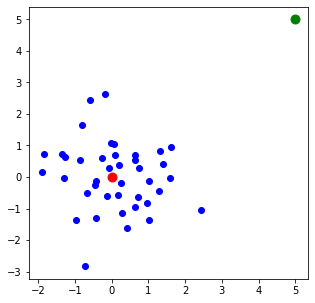

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(x[:, 0], x[:, 1], c='b')

ax.scatter(mu[0], mu[1], c='r', s=80)
ax.scatter(target[0], target[1], c='g', s=80)

In [13]:
def loss(z, target):
    return (np.linalg.norm(z - target, axis=1) ** 2).mean()

def lrg(z, mu, target):
    norm = np.linalg.norm(z - target, axis=1) ** 2
    # print('norm', norm)
    # print('z - mu', z - mu)
    grad = (norm[:, np.newaxis] * (z - mu)).mean(axis=0)

    # print('grad', grad)

    return grad

def train(mu, target, loss, lr, n_train, n_test, n_iter=10, viz=False):
    for it in range(n_iter):

        z = np.random.multivariate_normal(mean=mu, cov=I, size=n_train)
        pmu = mu
        lrgi = lrg(z, mu, target)
        mu = mu - lr * lrgi

        # visualization
        if viz:
            fig, ax = plt.subplots(1, 1, figsize=(5, 5))
            ax.set_xlim(-5, 6)
            ax.set_ylim(-5, 6)
            ax.scatter(z[:, 0], z[:, 1], c='b')

            ax.scatter(pmu[0], pmu[1], c='r', s=80, alpha=0.5)
            ax.scatter(mu[0], mu[1], c='r', s=80)
            ax.arrow(pmu[0], pmu[1], mu[0] - pmu[0], mu[1] - pmu[1], head_width=0.1, length_includes_head=True)
            ax.scatter(target[0], target[1], c='g', s=80)

        z_test = np.random.multivariate_normal(mean=mu, cov=I, size=n_test)
        lossi = loss(z_test, target)
        print(it, lossi)

When `n_train = 1`, the training is very unstable.
It diverges when `lr = 0.1` and converges slowly when `lr = 0.01`.

It is interesting to analyze the learning dynamic of the algorithm:

When `lr` is large, if we sample a bad datapoint (a datapoint closer to `target` than `mu`),
then `mu` is pushed further away from `target` by a large amount.
The error grows exponentially.

When `lr` is small, if a bad datapoint is sampled, `mu` moved by a only a small amount.
That (small) wrong update is corrected by other datapoints sampled later in the process.
Using smaller learning rate is similar to `wait' for more examples to be avaialble before
making a step.

Unstable------------
0 104.27521987198438
1 1264.362168189959
2 12330.180277419493
3 57800.59806970614
4 77505174.84466384
5 37778641508621.48
6 1.6984840090906994e+25
7 8.109059546163503e+48
8 8.109059546163503e+48
9 8.109059546163503e+48
10 8.109059546163503e+48
11 8.109059546163503e+48
12 8.109059546163503e+48
13 8.109059546163503e+48
14 8.109059546163503e+48
15 8.109059546163503e+48
16 8.109059546163503e+48
17 8.109059546163503e+48
18 8.109059546163503e+48
19 8.109059546163503e+48


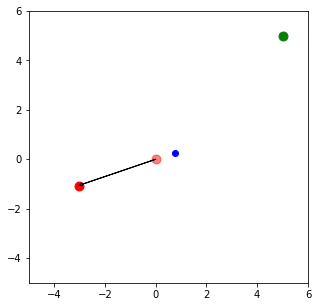

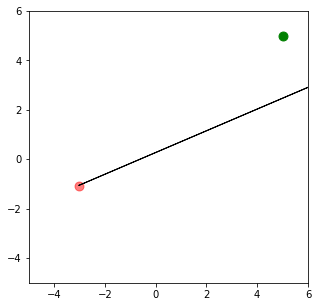

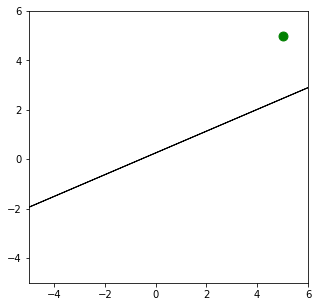

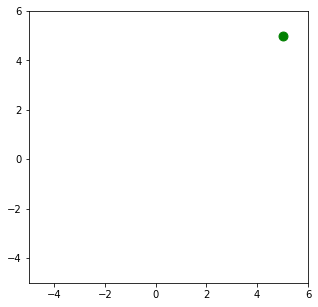

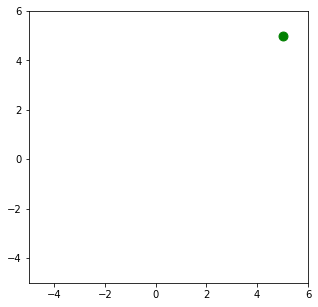

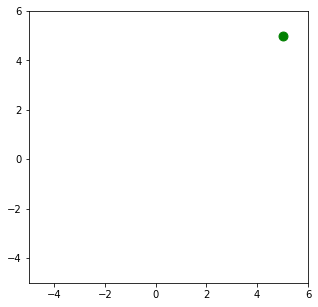

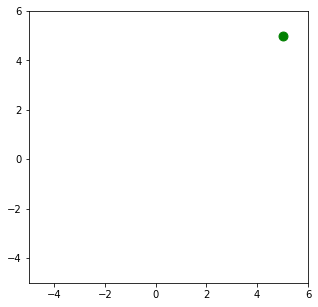

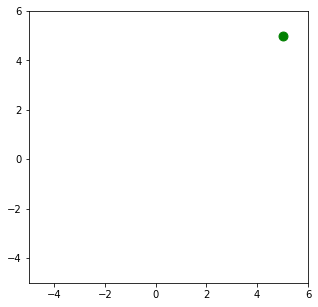

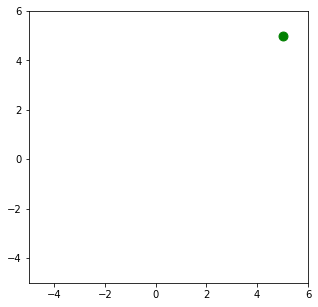

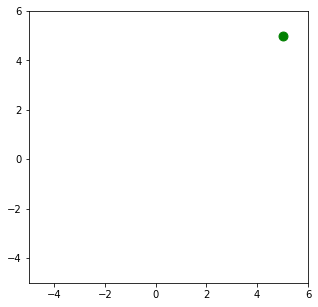

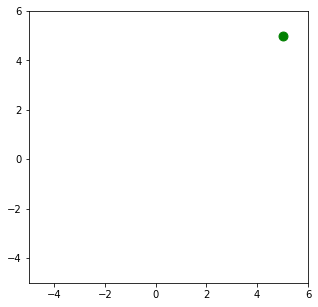

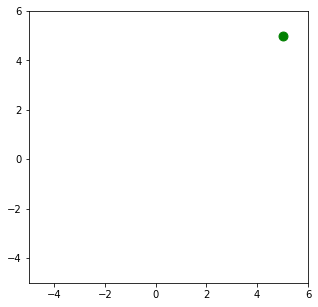

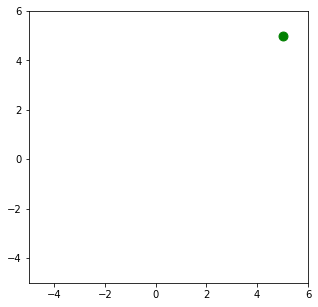

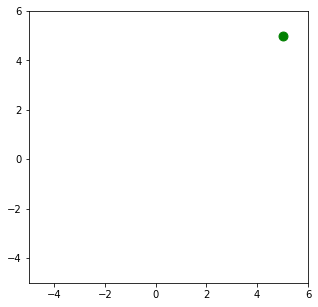

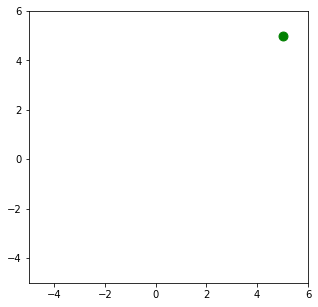

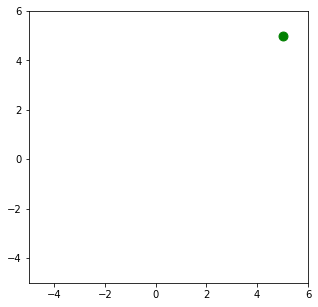

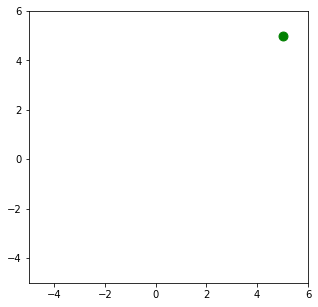

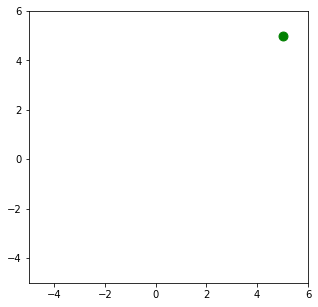

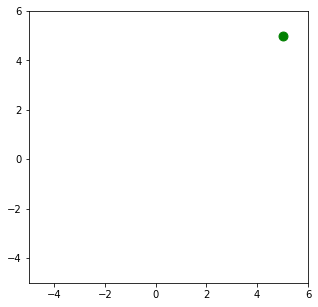

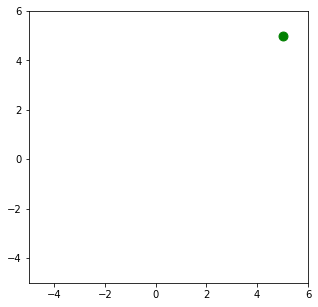

In [14]:
## unstable learning rate
print('Unstable------------')
train(mu, target, loss, lr=0.1, n_train=1, n_test=100, n_iter=20, viz=True)

Stable-----------
0 58.21564791132573
1 55.63594855257503
2 59.270503315862335
3 57.849257522926074
4 40.615768984911284
5 37.48636707553398
6 32.93155648290655
7 31.406694803861726
8 32.818859922206244
9 31.015434715987144
10 34.31904350002545
11 32.25805488078935
12 33.95617257926068
13 36.06023472949688
14 36.52945041869191
15 40.3974496006902
16 39.941827503843236
17 44.506918534670966
18 27.921403079369274
19 25.763773999383428
20 21.361600866878394
21 20.032203323150892
22 17.727288197411898
23 16.78376942345359
24 15.897480254156394
25 15.864964269648304
26 14.527026549796531
27 16.23448449149921
28 15.671022963254174
29 14.523910700436982
30 15.348376445278316
31 12.403799669091875
32 11.744894431032291
33 13.404262366787837
34 11.419215331467369
35 12.632683763475354
36 11.728954341318957
37 12.14176507045182
38 9.37314891022394
39 7.572434093789672
40 9.30598030581103
41 9.40978682945427
42 8.180654619163045
43 8.482849853107124
44 9.502066290880158
45 9.914487431049354
46 10

<ipython-input-13-03df4d4c30f5>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))


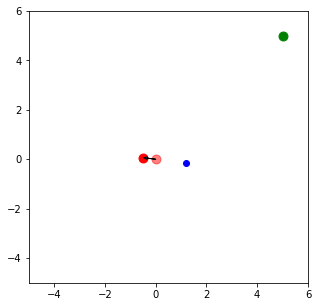

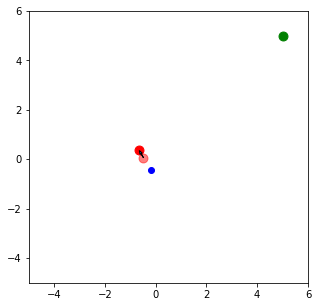

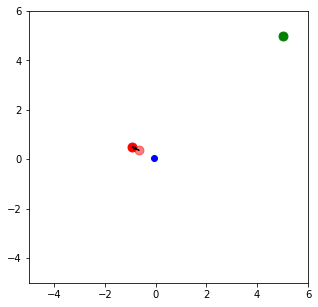

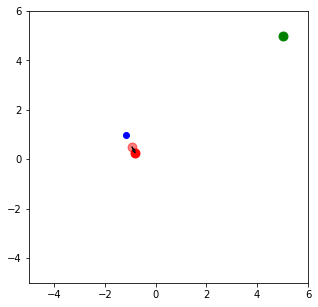

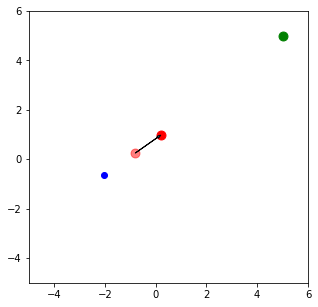

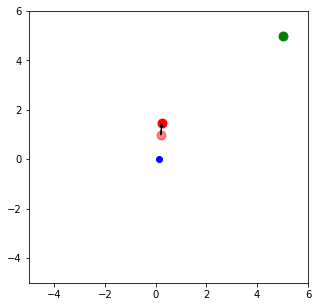

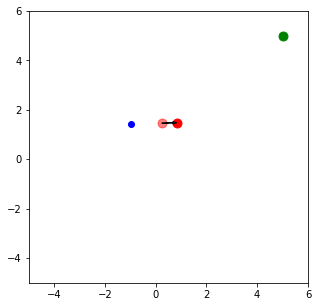

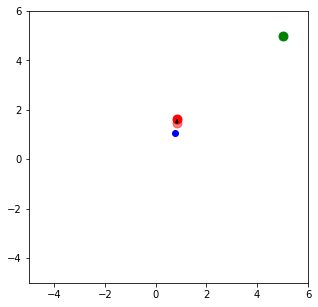

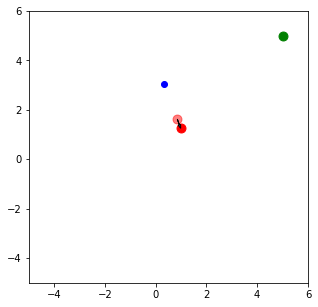

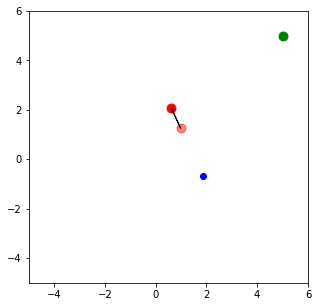

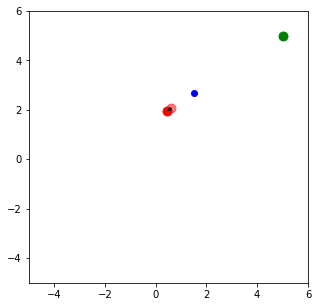

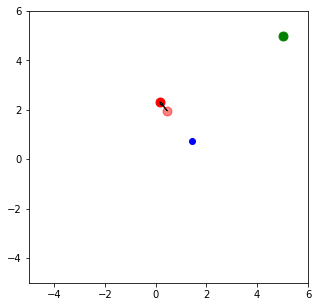

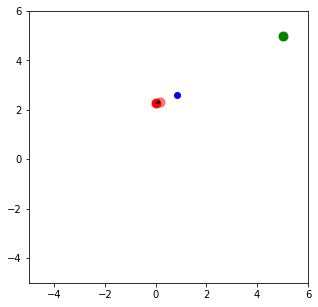

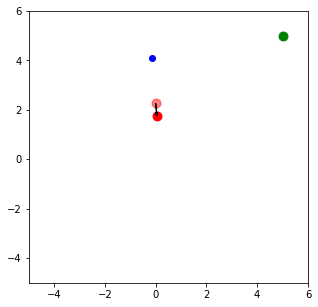

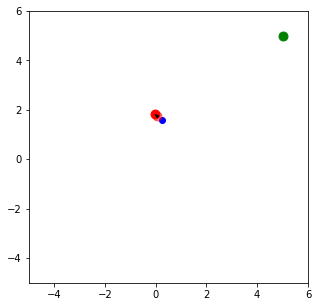

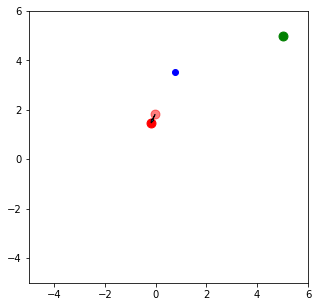

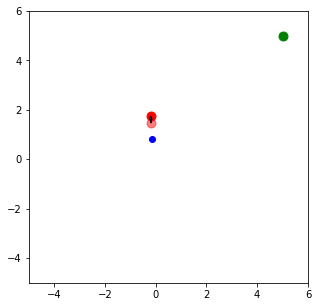

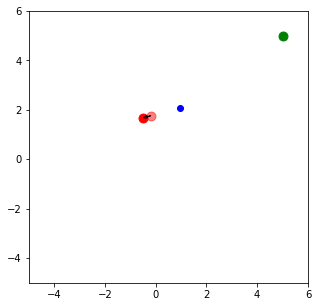

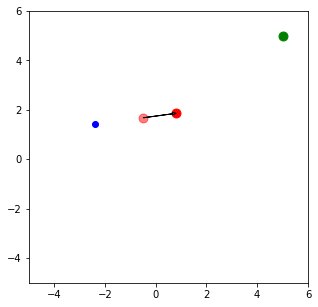

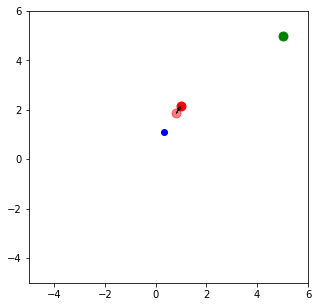

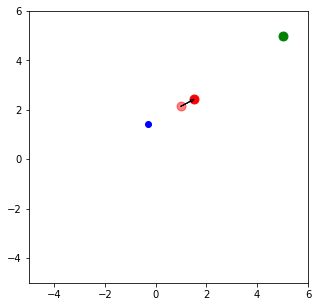

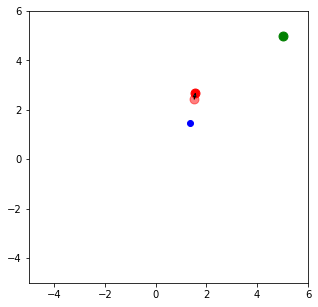

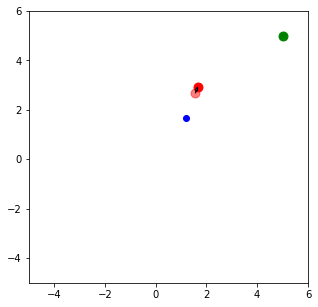

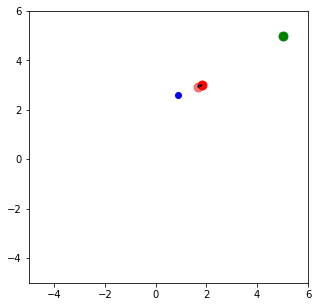

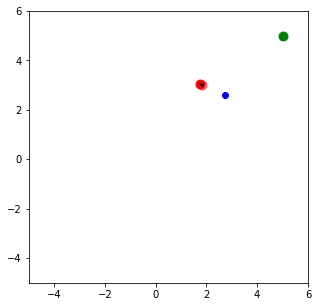

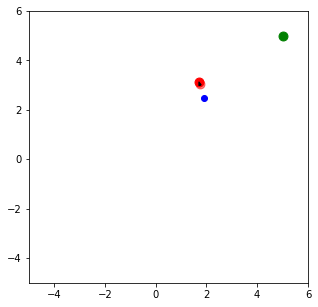

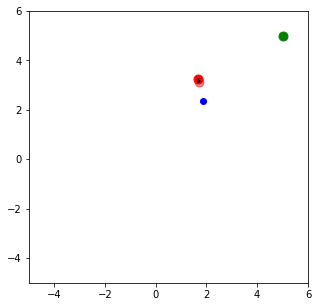

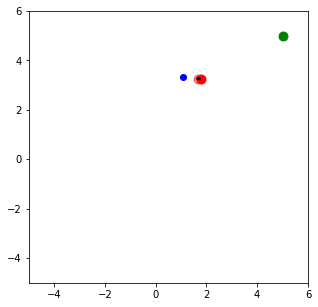

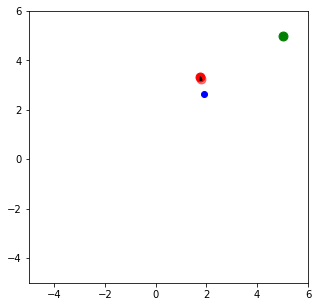

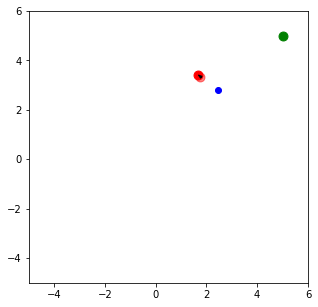

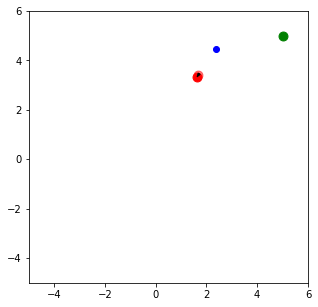

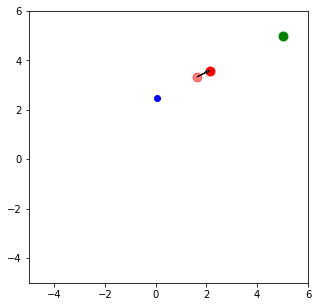

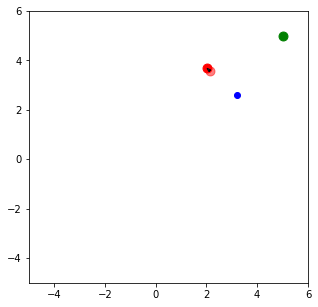

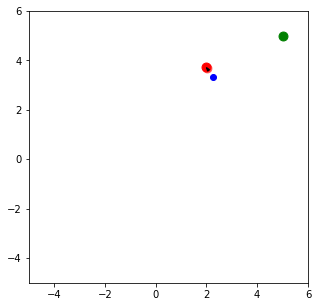

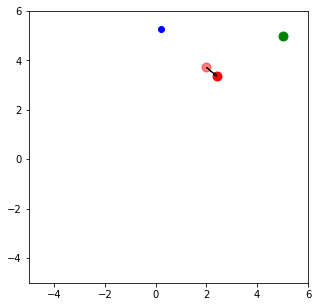

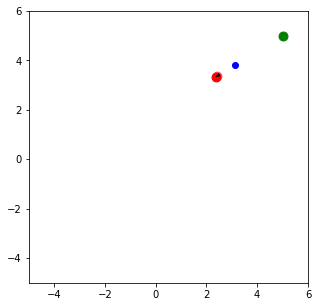

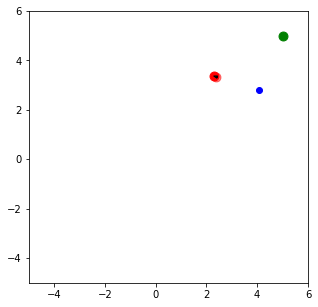

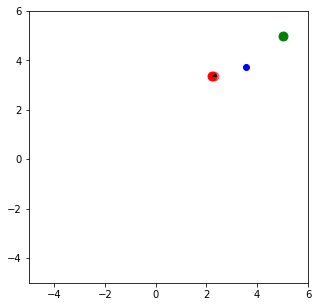

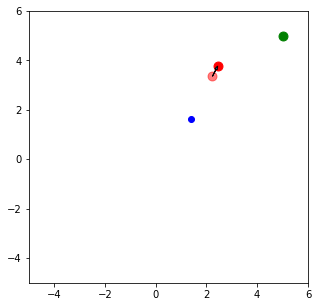

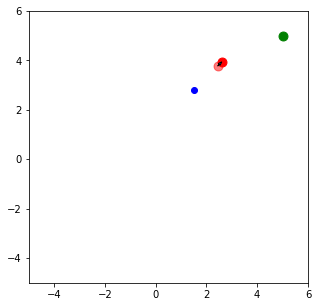

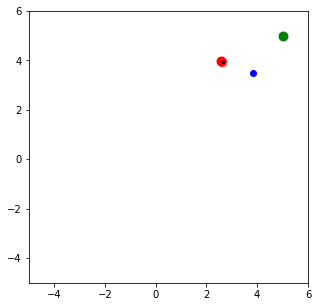

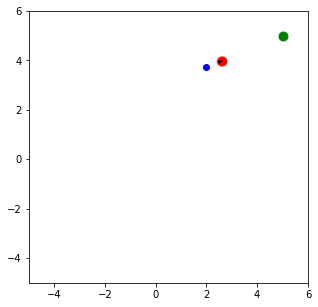

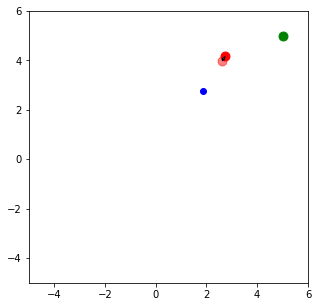

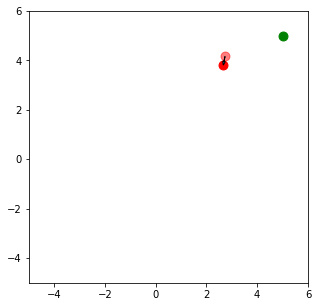

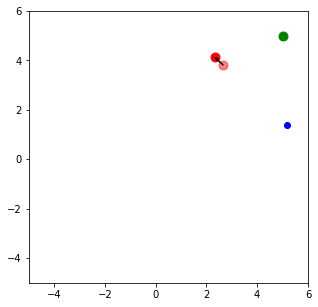

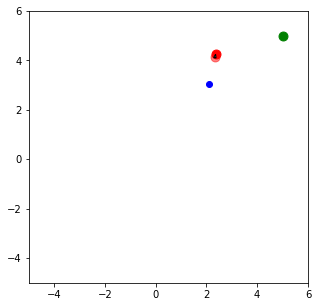

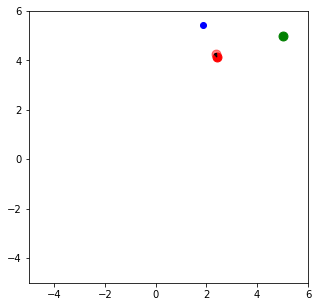

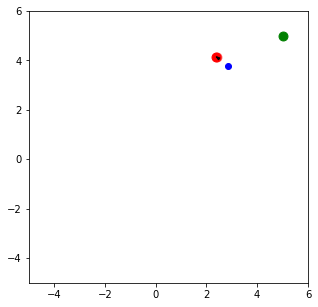

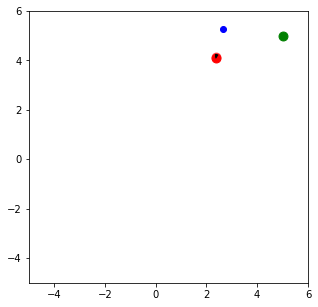

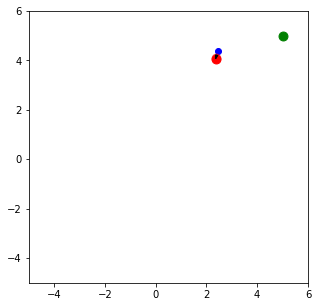

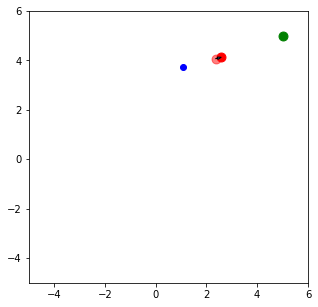

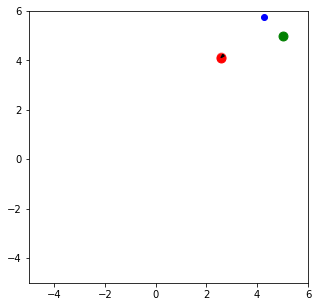

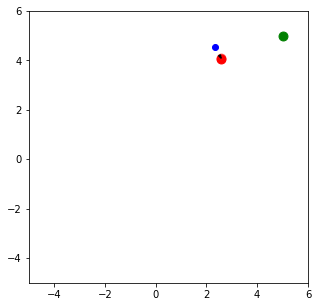

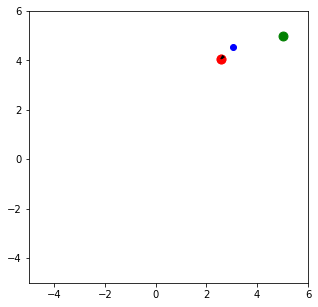

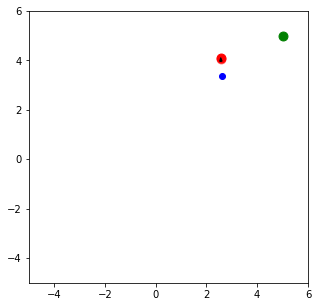

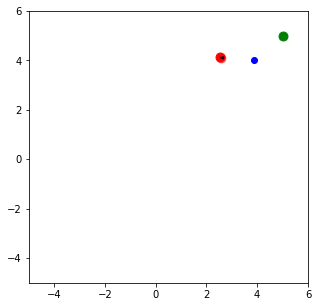

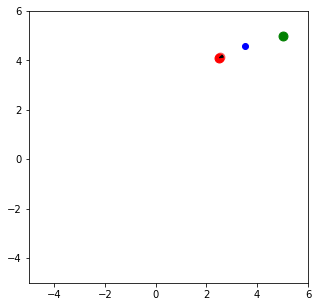

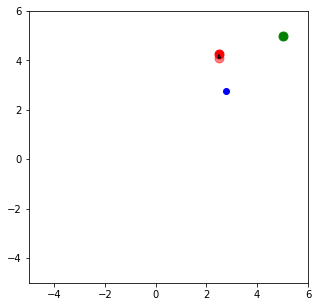

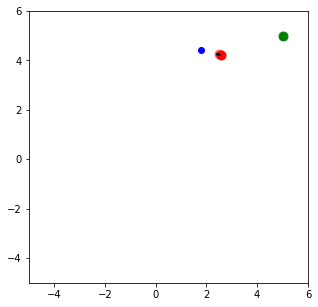

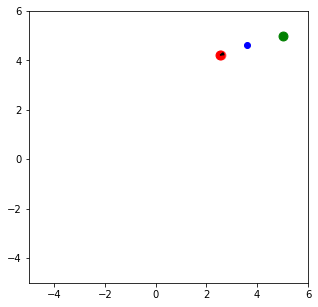

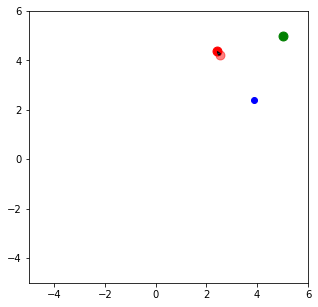

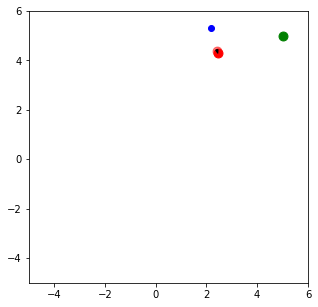

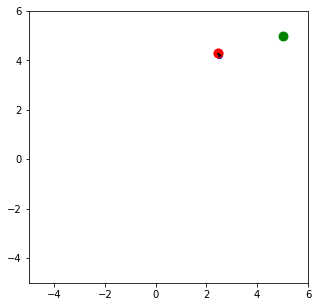

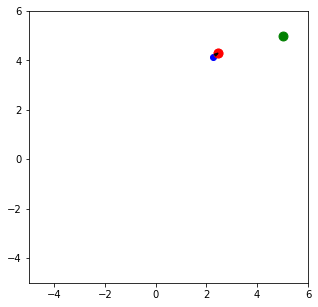

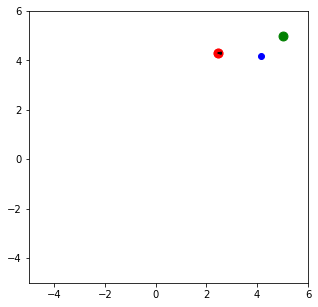

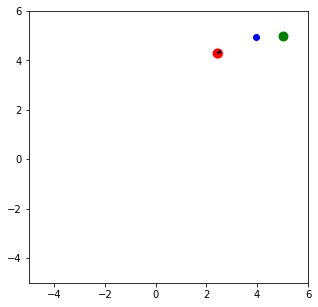

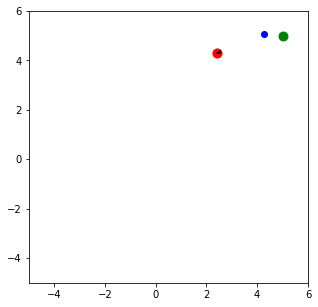

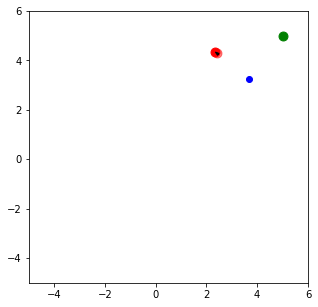

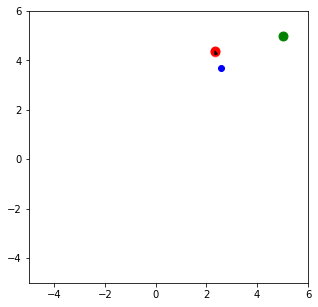

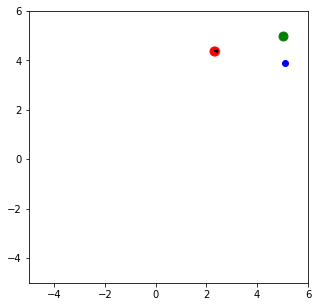

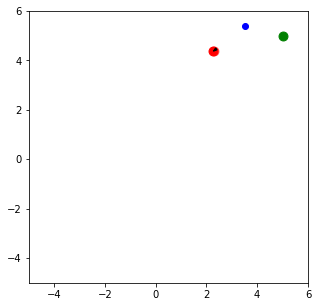

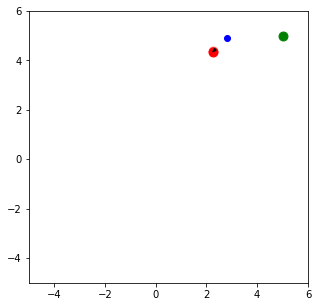

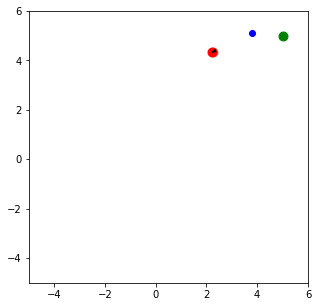

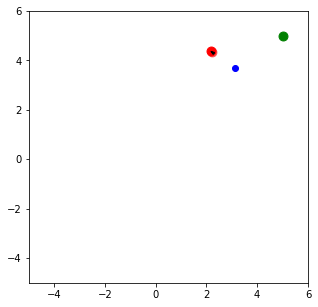

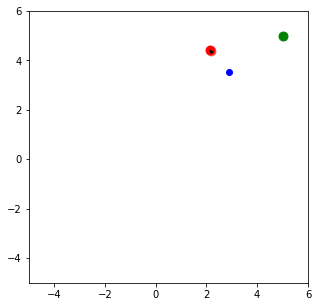

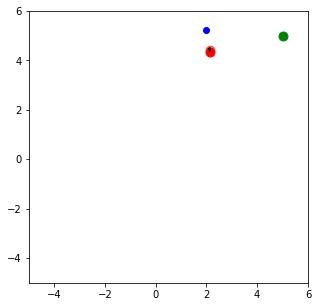

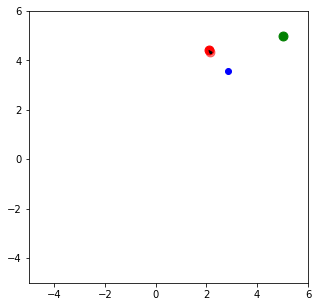

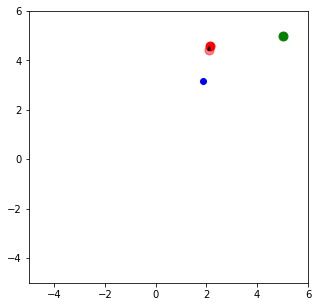

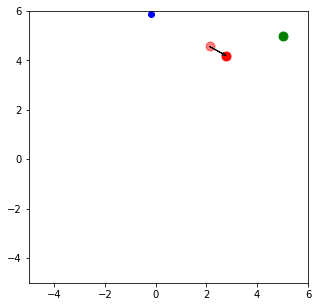

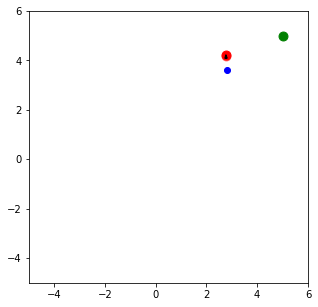

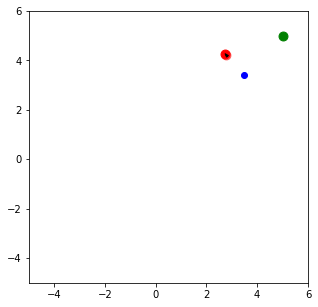

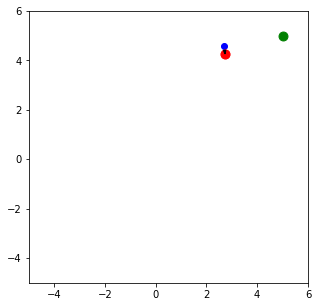

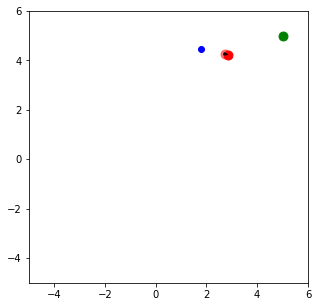

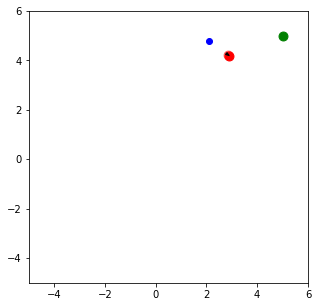

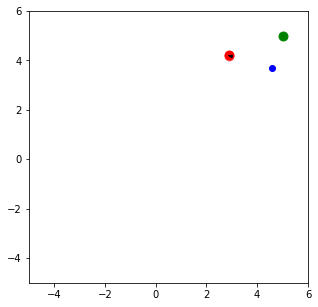

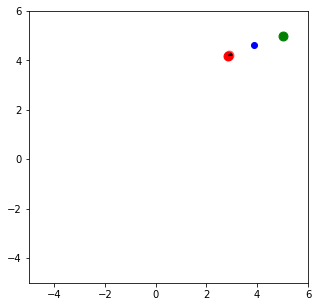

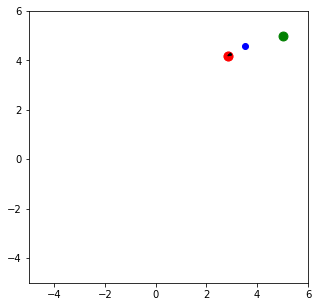

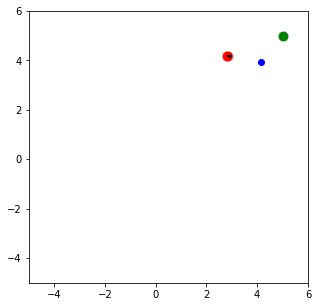

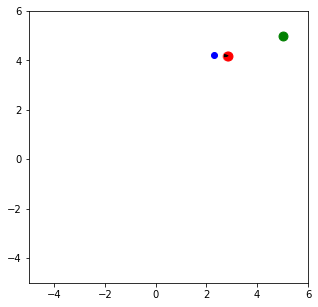

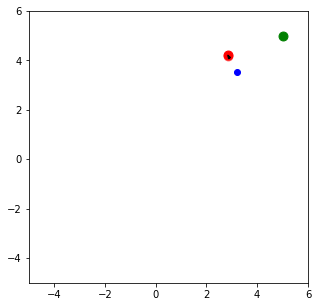

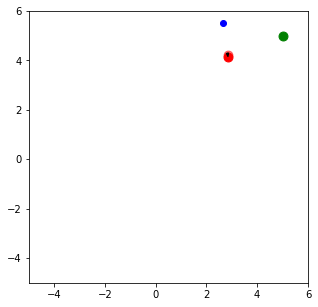

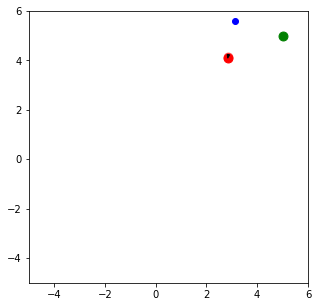

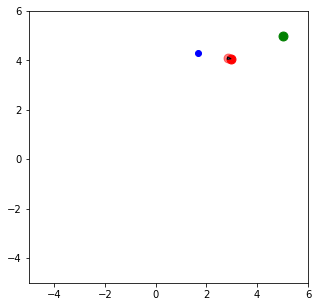

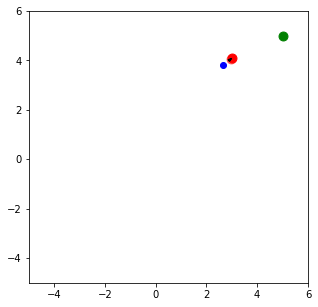

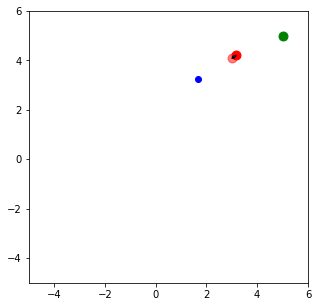

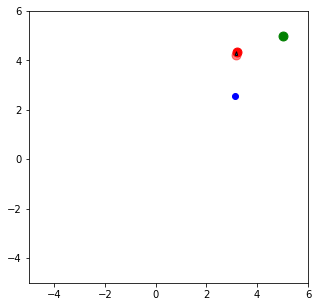

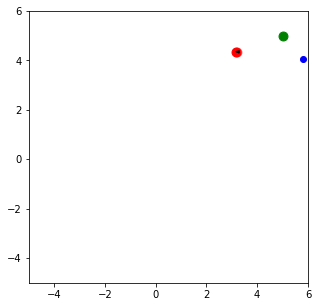

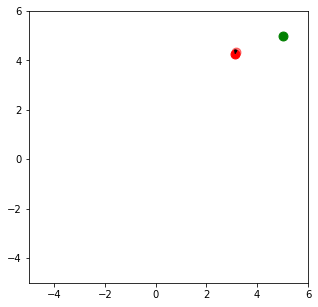

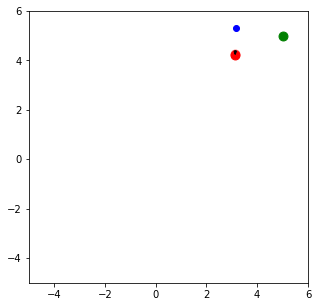

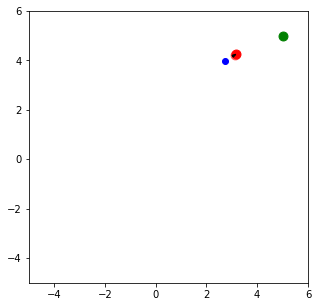

In [15]:
## stable learning rate
print('Stable-----------')
train(mu, target, loss, lr=0.01, n_train=1, n_test=100, n_iter=100, viz=True)


Increasing `n_train` improve the stability of the training. Now `lr = 0.1` and greater still works well.
We can learn much faster due to larger learning rate.

This is because the gradient signal given by `1` training datapoint is too noisy/wrong.
If we sample a datapoint closer to `target` then we end up pushing `mu` away from `target`.

Increasing `n_train` lowers the variance of the gradient, making the training more stable.
However, this solution quickly become intractable for high dimensional distributions.
The number of samples needed to reliably estimate $\mathbb{E}_{q_\phi (x)}[f(x)]$ grows
exponentially with the number of dimensions of $q_\phi$.

0 39.55791907749596
1 29.840187433909993
2 22.141769355690403
3 11.449138966582494
4 9.625180859979778
5 6.191430298678183
6 4.885843496409182
7 3.3760572364129615
8 2.712919913722427
9 2.7746520606790144
10 2.4251754585015126
11 2.1711574832475056
12 2.095708718496976
13 1.9554572625262614
14 1.577656946097084
15 1.9809859606243316
16 2.0440692277805264
17 1.9922993818536263
18 1.9614870358830396
19 1.7808466429693395
20 1.955641903863466
21 2.023334328330761
22 1.9172768727011407
23 1.8512006202564961
24 1.97067039610922
25 2.1386180124305447
26 1.8555241391029256
27 2.1106507746164507
28 2.338433159338055
29 1.923054883434036
30 1.959476242872704
31 1.7867498753729878
32 1.9011263565354541
33 1.934673542200233
34 2.2076318809290525
35 2.1238297756453575
36 2.1136712025462914
37 2.198853567895201
38 2.048491247728241
39 1.95806870268841
40 1.7849960466157828
41 2.063175513331621
42 1.8961656344201538
43 1.8649439996368247
44 2.2939595940441917
45 1.8311790222039042
46 2.2116490677345

<ipython-input-13-03df4d4c30f5>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))


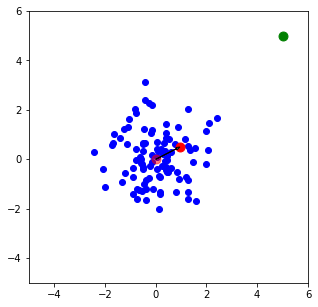

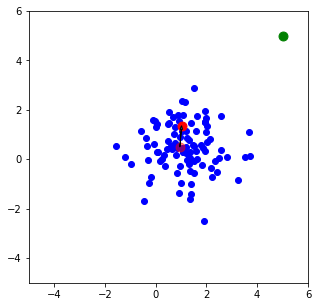

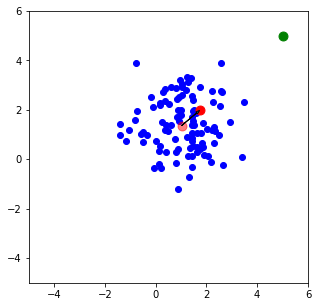

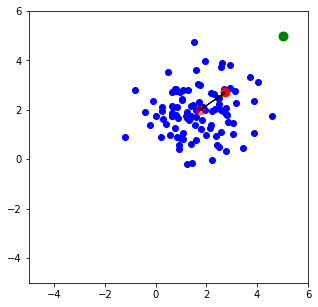

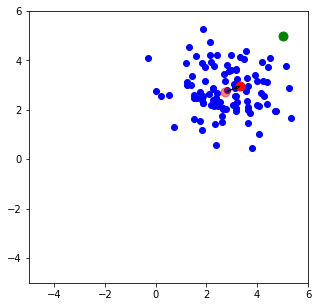

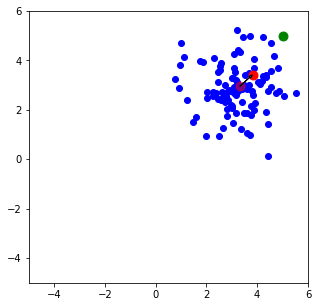

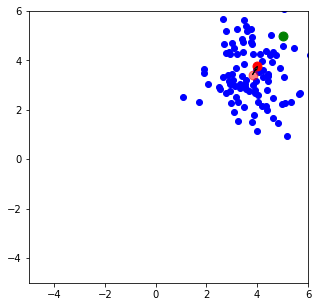

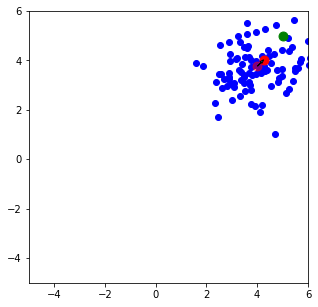

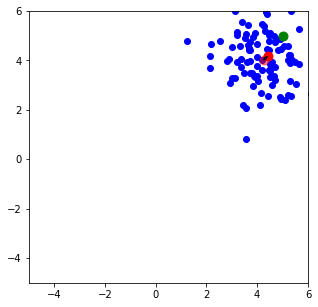

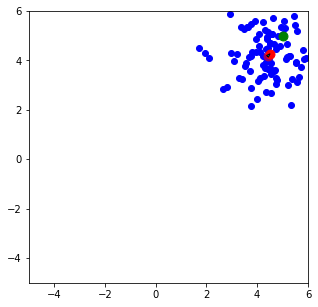

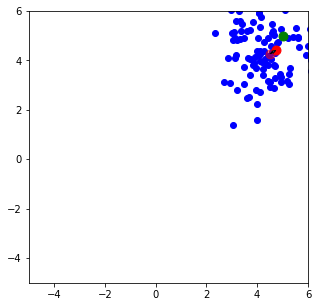

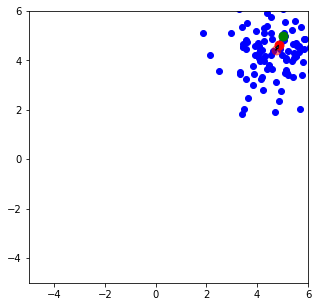

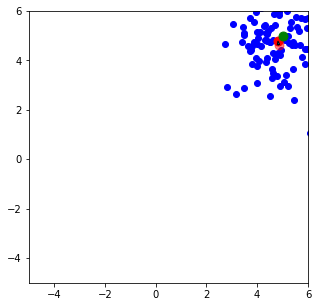

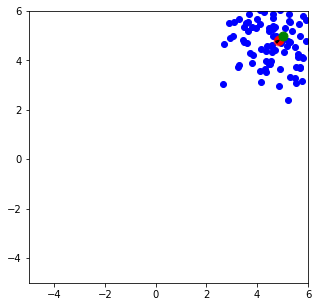

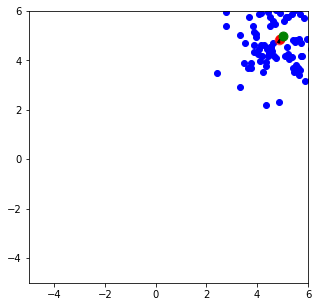

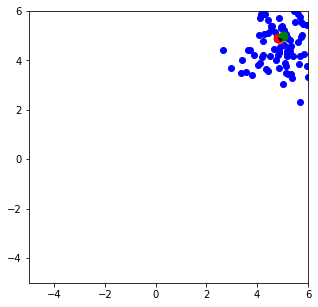

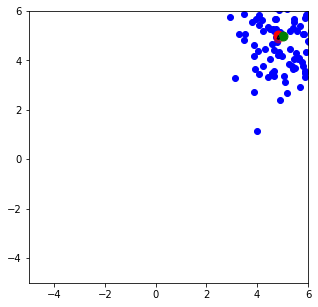

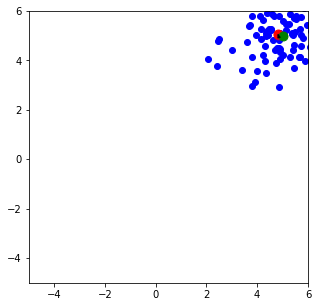

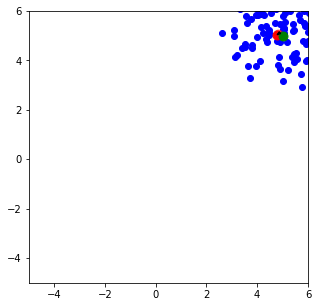

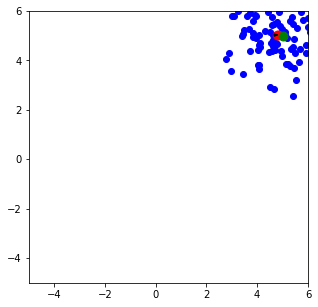

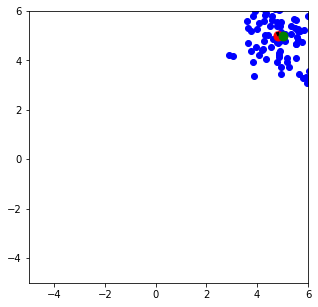

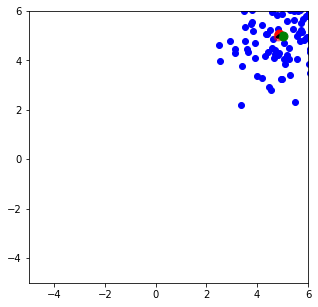

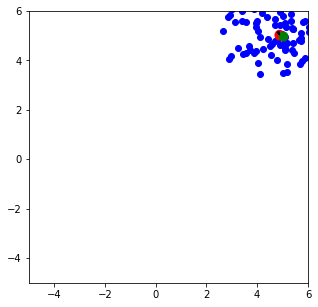

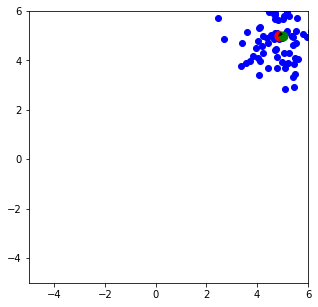

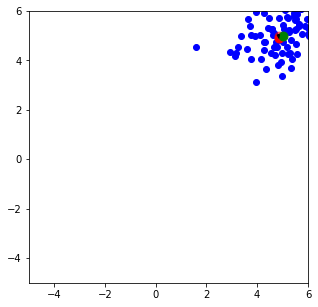

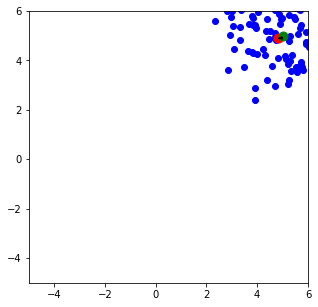

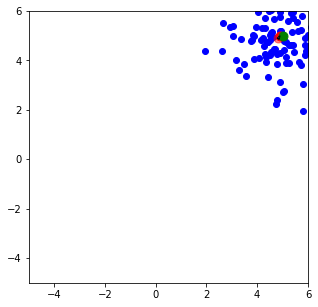

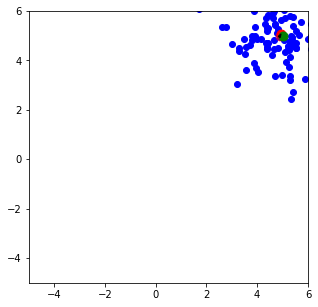

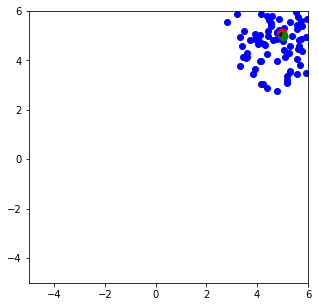

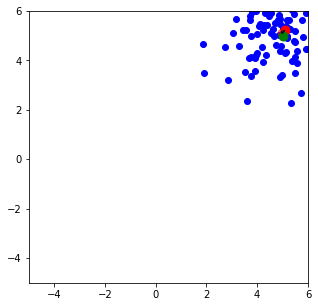

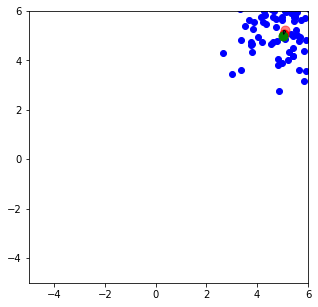

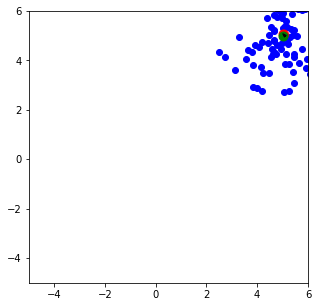

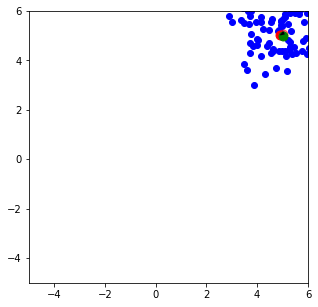

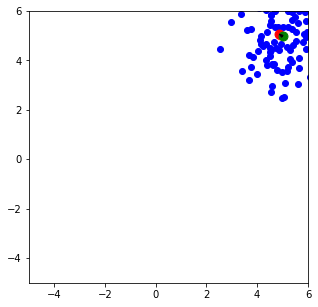

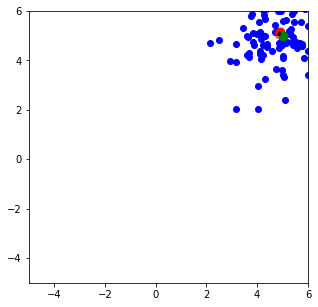

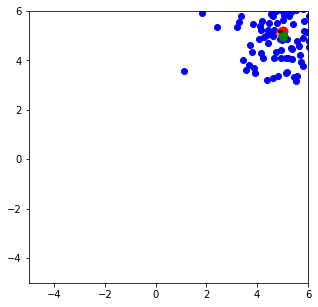

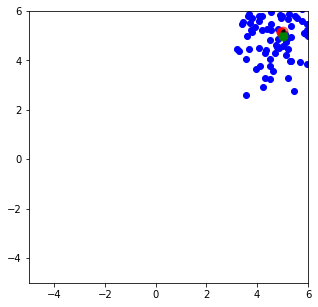

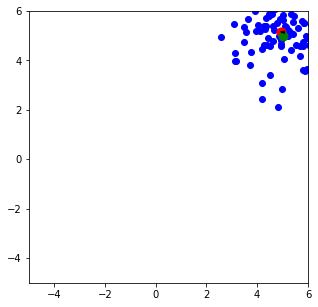

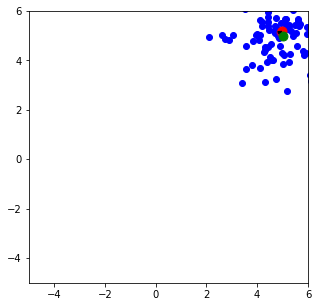

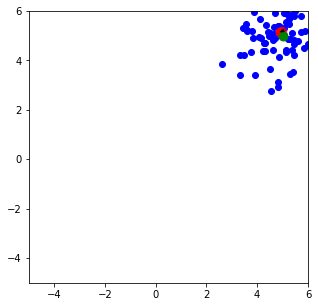

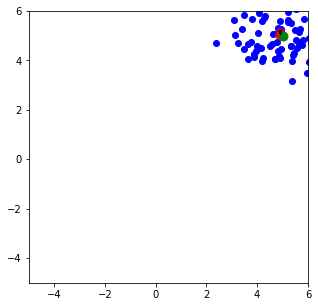

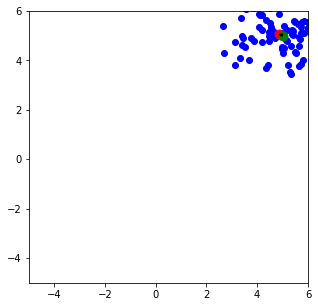

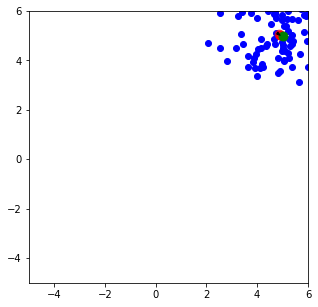

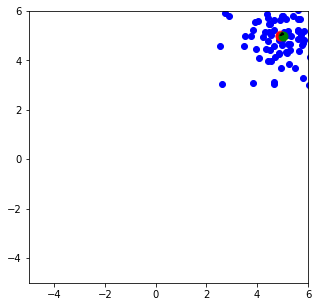

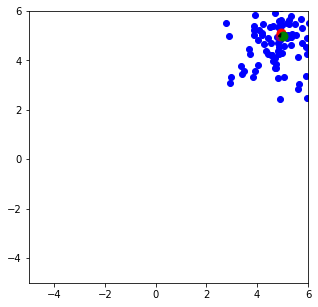

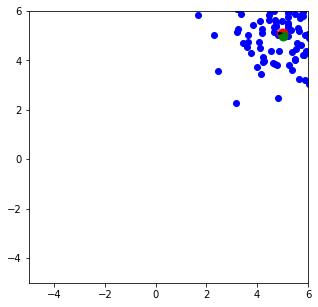

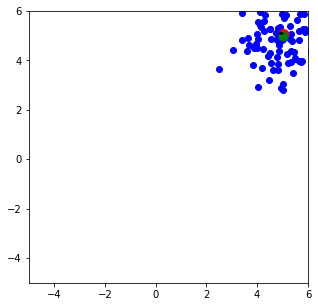

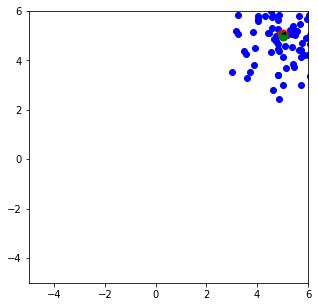

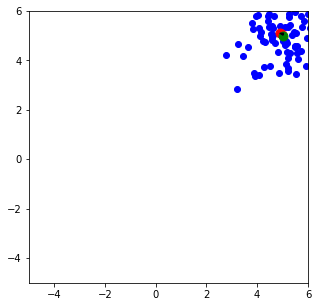

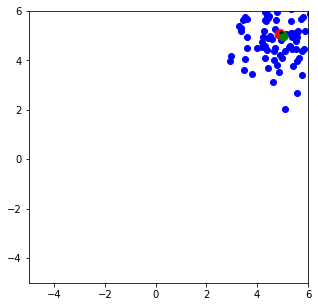

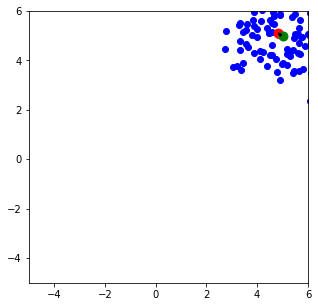

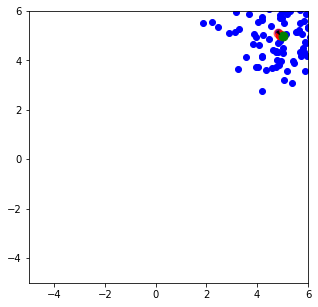

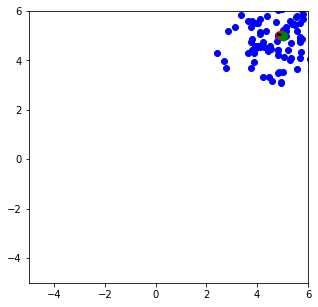

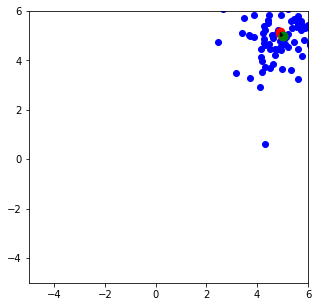

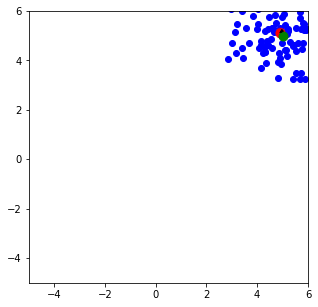

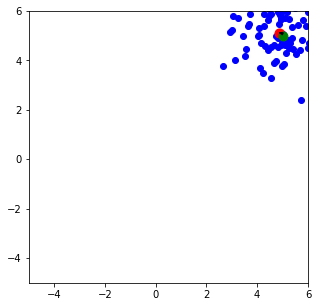

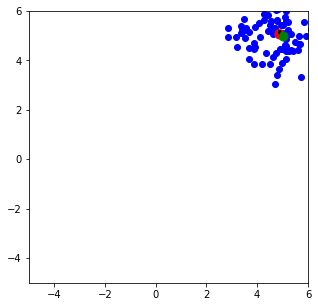

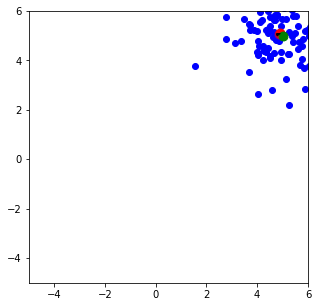

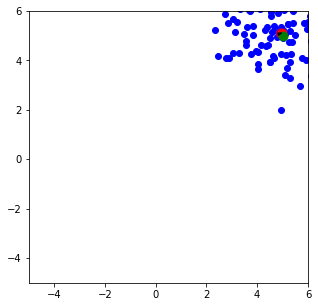

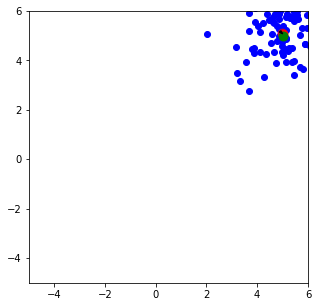

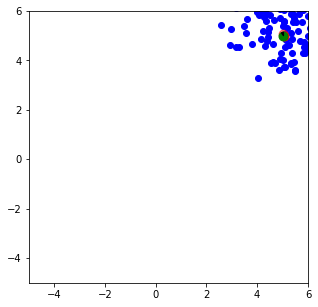

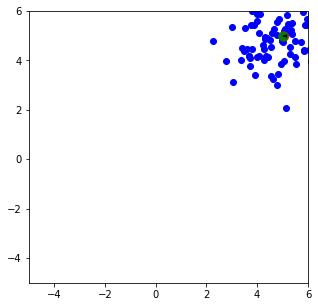

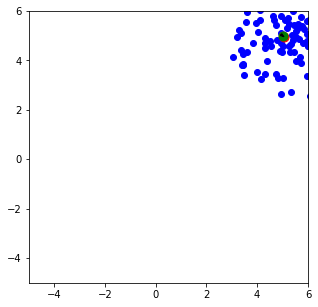

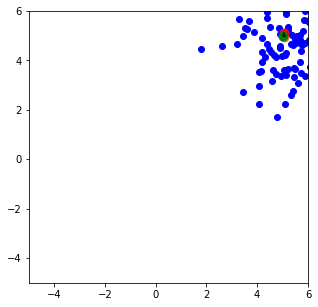

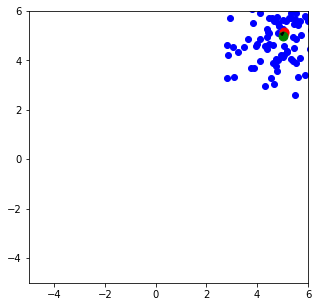

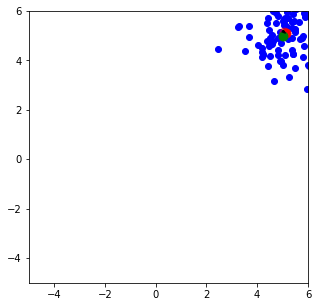

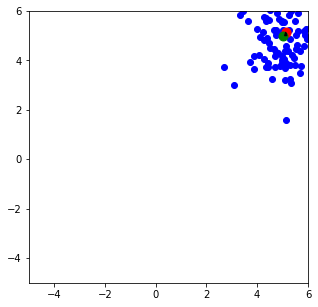

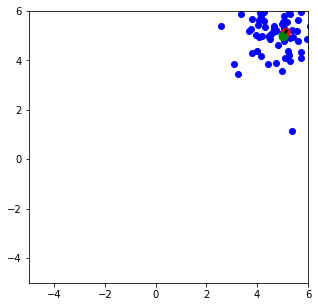

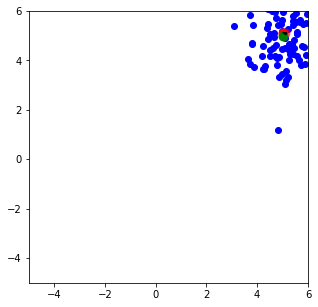

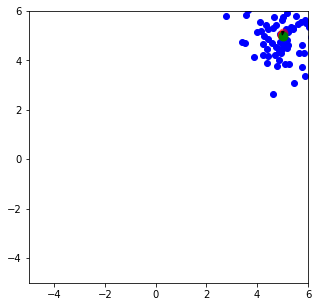

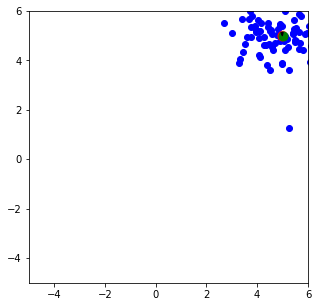

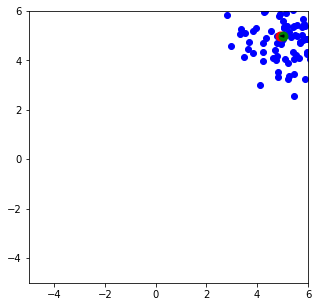

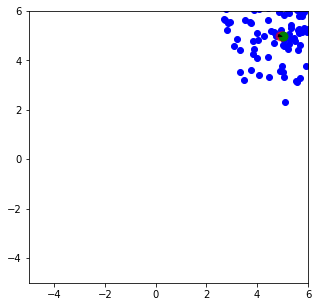

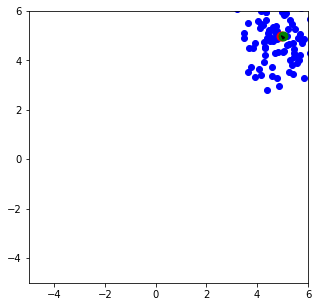

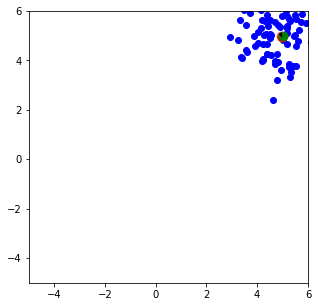

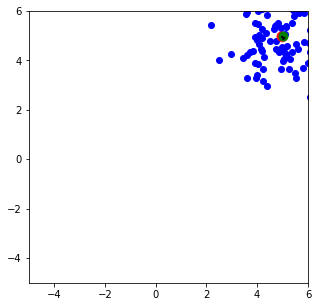

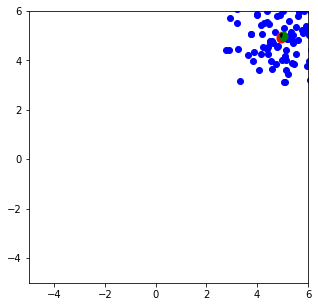

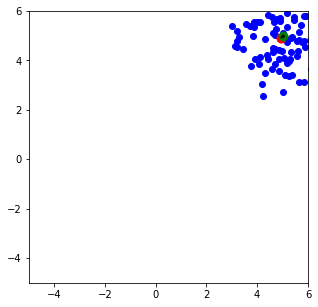

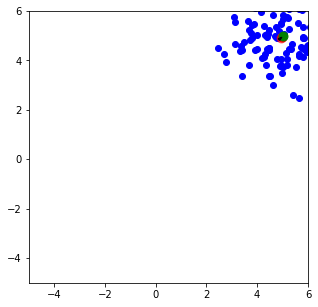

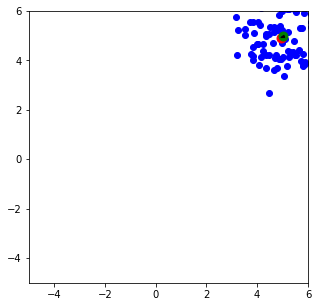

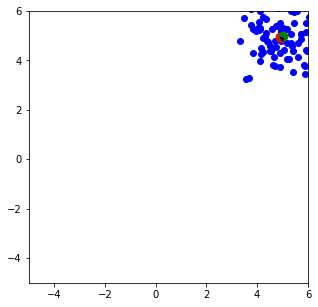

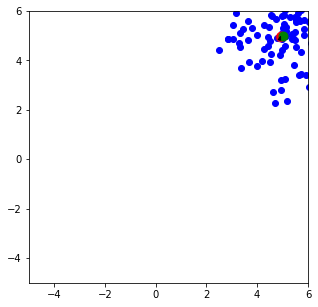

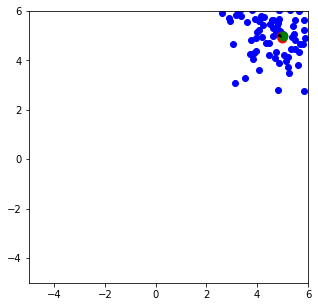

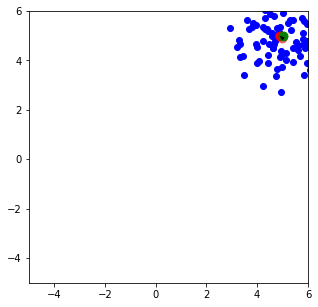

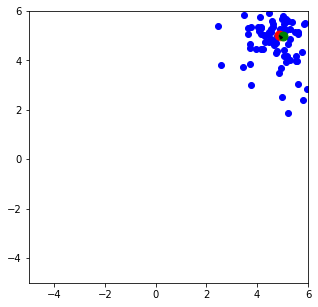

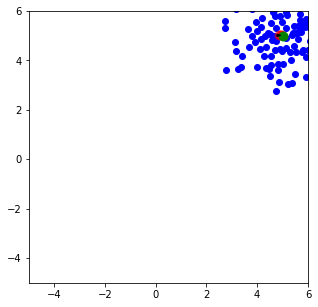

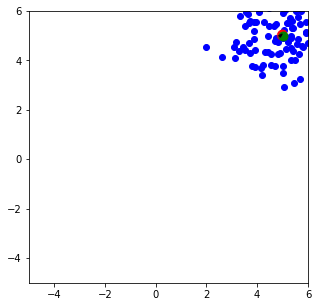

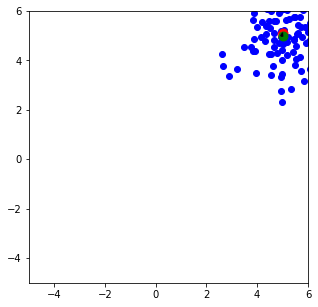

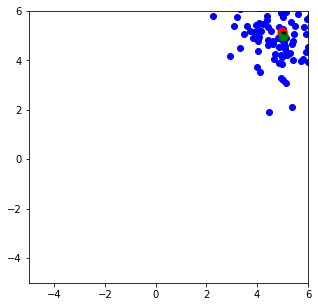

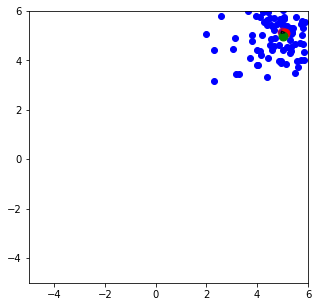

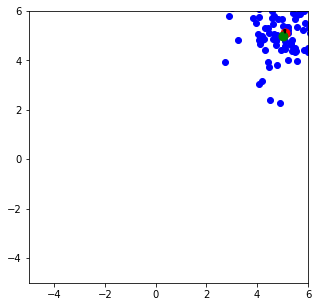

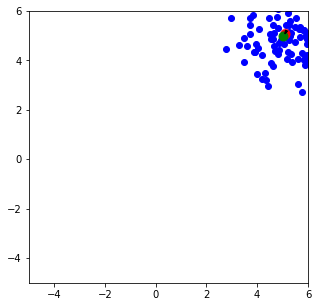

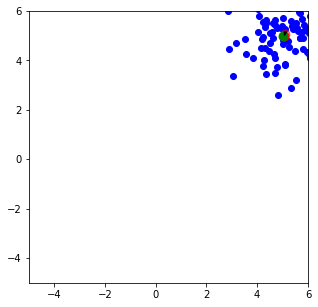

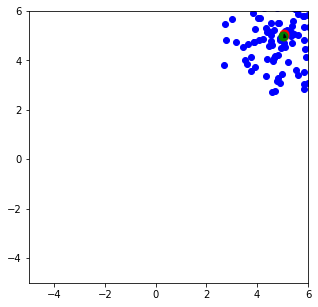

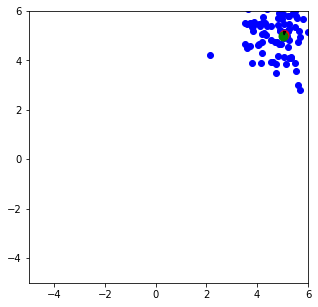

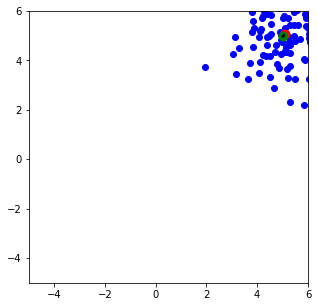

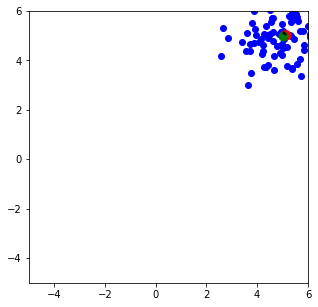

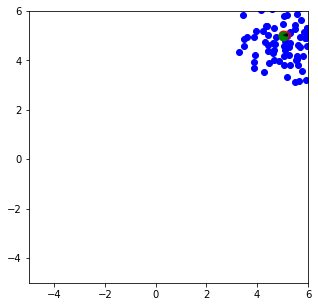

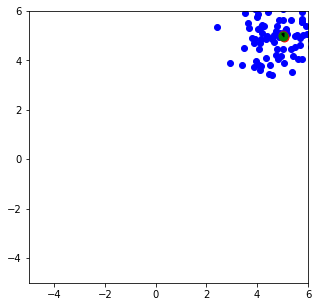

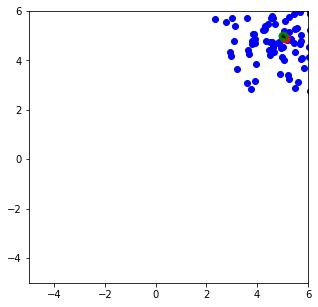

In [16]:
# train(mu, target, loss, lr=0.01, n_train=10, n_test=100, n_iter=100)

train(mu, target, loss, lr=0.1, n_train=100, n_test=100, n_iter=100, viz=True)